In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from malnis import show
import seaborn as sns
sns.set(style = "whitegrid")
from itertools import accumulate
from tqdm.notebook import tqdm

In [21]:
data = pd.read_pickle("final_results.pkl").sort_values("roc_auc")
show(data, 20)

(12, 6)


,global_ap,global_roc_auc,ap,ap_std,roc_auc,roc_auc_std
name,,,,,,
SPECTER,0.051,0.579,0.114,0.006,0.600,0.008
Transformer SBERT,0.131,0.648,0.160,0.016,0.628,0.010
SBERT,0.065,0.636,0.125,0.006,0.633,0.007
MLP SBERT,0.060,0.660,0.103,0.005,0.654,0.007
MLP SPECTER,0.071,0.693,0.115,0.005,0.678,0.006
LSTM SBERT,0.130,0.699,0.202,0.018,0.684,0.009
Transformer SPECTER,0.130,0.681,0.193,0.017,0.685,0.010
LSTM SPECTER,0.179,0.708,0.208,0.018,0.691,0.009
TFIDF Chars,0.092,0.712,0.152,0.007,0.701,0.006


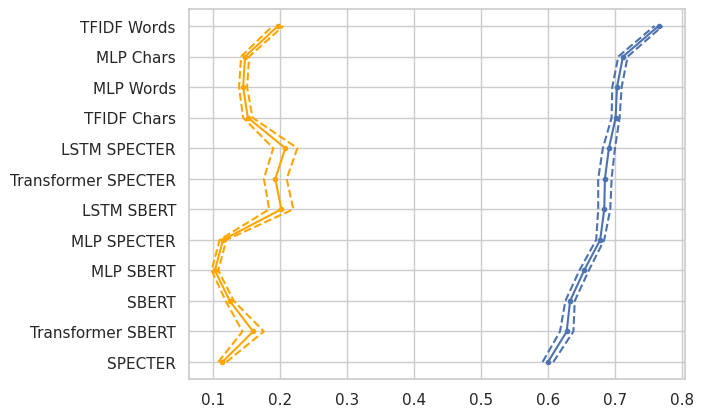

In [32]:
plt.plot(data.roc_auc, data.index, ".-")
plt.plot(data.roc_auc + data.roc_auc_std, data.index, "b--")
plt.plot(data.roc_auc - data.roc_auc_std, data.index, "b--")

plt.plot(data.ap, data.index, ".-", c = "orange")
plt.plot(data.ap + data.ap_std, data.index, "--", c = "orange")
plt.plot(data.ap - data.ap_std, data.index, "--", c = "orange")

# plt.xticks(np.linspace(0, 1, 11))
# plt.xlim(0, 1)
plt.show()

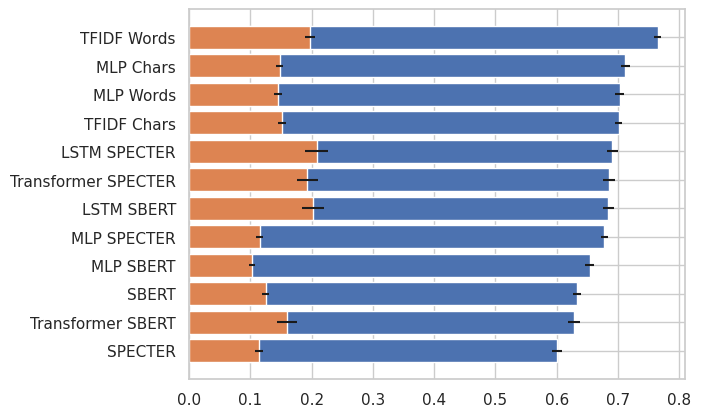

In [37]:
plt.barh(data.index, data.roc_auc, xerr = data.roc_auc_std)
plt.barh(data.index, data.ap, xerr = data.ap_std)
plt.show()

In [44]:
print(data.sort_values("ap", ascending = False).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  global\_ap &  global\_roc\_auc &     ap &  ap\_std &  roc\_auc &  roc\_auc\_std \\
name                &            &                 &        &         &          &              \\
\midrule
LSTM SPECTER        &      0.179 &           0.708 &  0.208 &   0.018 &    0.691 &        0.009 \\
LSTM SBERT          &      0.130 &           0.699 &  0.202 &   0.018 &    0.684 &        0.009 \\
TFIDF Words         &      0.129 &           0.775 &  0.197 &   0.008 &    0.765 &        0.006 \\
Transformer SPECTER &      0.130 &           0.681 &  0.193 &   0.017 &    0.685 &        0.010 \\
Transformer SBERT   &      0.131 &           0.648 &  0.160 &   0.016 &    0.628 &        0.010 \\
TFIDF Chars         &      0.092 &           0.712 &  0.152 &   0.007 &    0.701 &        0.006 \\
MLP Chars           &      0.099 &           0.734 &  0.148 &   0.006 &    0.712 &        0.007 \\
MLP Words           &      0.096 &           0.726 &  0.145 &   0.006 &    0

/tmp/ipykernel_506666/3722197139.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.sort_values("ap", ascending = False).to_latex())
